# Toy Example

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations_with_replacement
from utils.path_finder import PathFinder
import networkx as nx

## Events in SimpleAnalysis Style

Simple Analysis provides us with either accepted (1) or rejected (0) events from different signal regions (SR).
These can also be from whole different analyses.
The shapes of the five SRs overlap in a highdimensional setting. For demostration 
purposes this is projected onto 2D.

![](../other/image.png)

The data does ***not*** correspond perfectly to the image above but gives an intuition about
how data can be correlated.

In [12]:
df_SR_events = pd.DataFrame(data=[[1, 0, 0, 0, 0], 
                                  [0, 0, 0, 1, 1], 
                                  [0, 1, 1, 0, 0], 
                                  [0, 1, 1, 0, 0], 
                                  [0, 1, 0, 0, 0], 
                                  [0, 0, 1, 1, 0], 
                                  [0, 0, 1, 0, 1]])
df_SR_events = df_SR_events.rename(columns={0: "SR_1",
                                            1: "SR_2", 
                                            2: "SR_3", 
                                            3: "SR_4", 
                                            4: "SR_5"})
print(df_SR_events)

   SR_1  SR_2  SR_3  SR_4  SR_5
0     1     0     0     0     0
1     0     0     0     1     1
2     0     1     1     0     0
3     0     1     1     0     0
4     0     1     0     0     0
5     0     0     1     1     0
6     0     0     1     0     1


Retrieve signal region names.

In [7]:
SR_names = list(df_SR_events.columns)
print("Signal Regions in this toy example",*SR_names)

Signal Regions in this toy example SR_1 SR_2 SR_3 SR_4 SR_5


## Generate Combinations

In [14]:
combs = [comb for comb in combinations_with_replacement(SR_names, r=2)]
indices = [idx for idx in combinations_with_replacement(range(0, len(SR_names)), r=2)]
print("Print combinations of SRs: ", *combs)
print("\n")
print("Print combinations of indeces: ", *indices)

Print combinations of SRs:  ('SR_1', 'SR_1') ('SR_1', 'SR_2') ('SR_1', 'SR_3') ('SR_1', 'SR_4') ('SR_1', 'SR_5') ('SR_2', 'SR_2') ('SR_2', 'SR_3') ('SR_2', 'SR_4') ('SR_2', 'SR_5') ('SR_3', 'SR_3') ('SR_3', 'SR_4') ('SR_3', 'SR_5') ('SR_4', 'SR_4') ('SR_4', 'SR_5') ('SR_5', 'SR_5')


Print combinations of indeces:  (0, 0) (0, 1) (0, 2) (0, 3) (0, 4) (1, 1) (1, 2) (1, 3) (1, 4) (2, 2) (2, 3) (2, 4) (3, 3) (3, 4) (4, 4)


## Iterate through Combinations and Calulate Correlation matrix

The correlation of signal regions is evaluated with the following formula:<br>
$$\mathrm{corr}(\mathbf{SR_i}, \mathbf{SR_j}) = \frac{\mathbf{SR_i}\cdot \mathbf{SR_j}}{|\mathbf{SR_i}|\cdot |\mathbf{SR_j}|}$$
This is just the formula for determining the angle between two vectors.<br>
<br>
![](../other/vectors.png)

In [9]:
correaltion_matrix = np.empty(shape=(len(SR_names), len(SR_names)))
for idxs, comb in zip(indices, combs):
    i, j = idxs
    vec_i = df_SR_events[comb[0]]
    vec_j = df_SR_events[comb[1]]
    correaltion_matrix[i, j] = np.dot(
        a=vec_i,
        b=vec_j)/(np.linalg.norm(vec_i) * np.linalg.norm(vec_j))
    if i != j:
        correaltion_matrix[j, i] = correaltion_matrix[i, j]
print(np.round(correaltion_matrix, 3))

[[1.    0.    0.    0.    0.   ]
 [0.    1.    0.577 0.    0.   ]
 [0.    0.577 1.    0.354 0.354]
 [0.    0.    0.354 1.    0.5  ]
 [0.    0.    0.354 0.5   1.   ]]


## Initialize Pathfinder Algorithm

On thing that the path finder algorithm does for is is to apply the threshold and observe if one edge is accessible or not.
For this case the matrix would look like the following.<br>
<br>
![](../other/binary_corr_matrix.png)


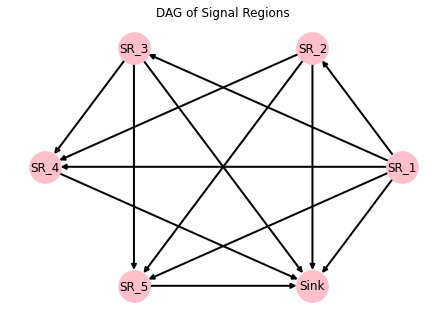

In [15]:
node_dict = {0: "SR_1",
             1: "SR_2", 
             2: "SR_3", 
             3: "SR_4", 
             4: "SR_5",
             5: "Sink"}

# path finder
pf = PathFinder(correlations=correaltion_matrix,
                threshold=0.4,
                weights=None)

# transform idx nodes and edges from graph 
nodes_idx = pf.graph._node
nodes_sr = [node_dict[node] for node in nodes_idx]
edges_idx = pf.graph.edges()
edges_sr = [(node_dict[edge_tupl[0]], node_dict[edge_tupl[1]]) for edge_tupl in edges_idx]

dag = nx.DiGraph()


dag.add_nodes_from(nodes_sr)
dag.add_edges_from(edges_sr)
nx.draw_circular(G=dag, 
                 with_labels=True,
                 node_color="pink",
                 node_size=1000,
                 width=2)
plt.title("DAG of Signal Regions")
plt.axis("off")
plt.savefig("../other/dag.png")
plt.show()

## Start Algorithm for Finding Top Graph

In [11]:
longest_path = nx.dag_longest_path(dag)
proposed_path = pf.find_path(top=5)
print(f"Longest path with the highest weight is {proposed_path[0]}."
      "\nOthers are possible but this was ranked number one."
      "\nDifferent result with weights.")


Start finding top graph...



100%|██████████| 5/5 [00:00<00:00, 5417.60it/s]

Longest path with the highest weight is {'path': [0, 2, 4], 'weight': 3.0}.
Others are possible but this was ranked number one.
Different result with weights.
